In [1]:
import pandas as pd
import torch

In [14]:
# Load the dataset for Car Reviews of Dodge cars
car_reviews = pd.read_csv("Scraped_Car_Review_dodge.csv", delimiter = ',')
car_reviews

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating
0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625
1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125
2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000
3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500
4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875
...,...,...,...,...,...,...
1579,on 12/14/06 12:43 PM (PST),Kelly Lloyd,1997 Dodge Caravan Minivan LE 4dr Minivan,One Great Van.,This has been a terrific van. It has never fa...,4.250
1580,on 09/23/05 22:01 PM (PDT),Paul Revere,1997 Dodge Caravan Minivan SE 3dr Minivan,It does everything,"One of best I have ever owned, along with Hon...",3.250
1581,on 07/26/05 06:38 AM (PDT),june,1997 Dodge Caravan Minivan SE 3dr Minivan,Reliable,This car is fun to drive and also reliable as...,4.750
1582,on 07/25/05 19:49 PM (PDT),Julie Lorentz,1997 Dodge Caravan Minivan ES 4dr Minivan,I love my Caravan,I have had very good luck with my Caravan. I...,4.000


In [34]:
# Add a Sentiment column to the dataframe according to the Rating received; Positive:1 and Negative:0
car_reviews["Sentiment"] = ""
for i in range(len(car_reviews)):
    if car_reviews.iloc[i]["Rating"] > 2.5:
        car_reviews.at[i,"Sentiment"] = "1" 
    else:
        car_reviews.at[i,"Sentiment"] = "0"

In [35]:
car_reviews.head(10)

,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Sentiment,Review_Length
0,on 10/13/05 15:30 PM (PDT),roadking,2002 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Great delivery vehicle,It's been a great delivery vehicle for my caf...,4.625,1,278
1,on 07/17/05 21:59 PM (PDT),Mark,2002 Dodge Ram Cargo Van 3500 3dr Ext Van (5.2...,Disappointmnet,Bought this car as a commuter vehicle for a v...,2.125,0,631
2,on 07/16/02 00:00 AM (PDT),Tom Sheer,2002 Dodge Ram Cargo Van 3500 Maxi 3dr Ext Van...,Sweet van,"This van rocks its the best, lots of \rroom. ...",5.000,1,113
3,on 12/29/07 21:57 PM (PST),Keven Smith,2001 Dodge Ram Cargo Van 2500 Maxi 3dr Ext Van...,Keven Smith,Great work vehicle. Drives nice. has lots of ...,4.500,1,97
4,on 02/09/05 18:52 PM (PST),VanMan,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,Not what Dodge used to be,Good solid frame and suspension. Well equipp...,2.875,1,701
5,on 05/17/04 00:00 AM (PDT),driverage,2001 Dodge Ram Cargo Van 1500 3dr Van (3.9L 6c...,2001 dodge 1500 ram van,some very early body rust on roof,2.250,0,34
6,on 08/01/17 16:40 PM (PDT),Guy,2003 Dodge Ram Cargo Van 2500 3dr Ext Van (5.2...,Failur is lurking in every corner,Purchased the vehicle in 2003 second hand wit...,3.000,1,965
7,on 02/25/06 06:09 AM (PST),smithtp,2003 Dodge Ram Cargo Van 1500 3dr Ext Van (3.9...,Great Van,"Bought used with 34k,the conversion package b...",4.625,1,641
8,on 03/03/04 00:00 AM (PST),Dodgem,2003 Dodge Ram Cargo Van 1500 3dr Ext Van (3.9...,She's a looker!,I bought the van new with a conversion \rpack...,4.000,1,389
9,on 08/06/15 07:14 AM (PDT),Mike azuela,2006 Dodge Magnum Wagon RT 4dr Wagon (5.7L 8cy...,Its been a nightmare,"Since ive had this car, the water pump, upper...",2.000,0,141


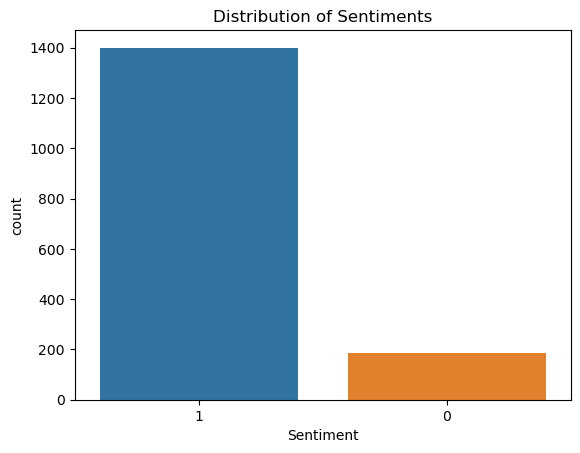

In [36]:
# Plot the distribution of sentiment classes
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = "Sentiment", data = car_reviews)
plt.title("Distribution of Sentiments")
plt.show()

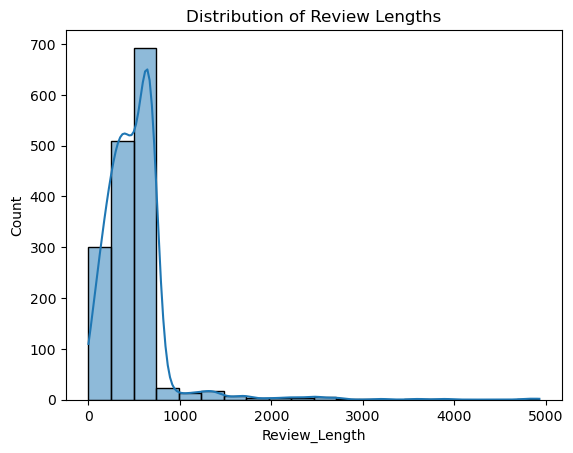

In [37]:
# Plot the distribution of review lengths
car_reviews["Review_Length"] = car_reviews["Review"].apply(len)
sns.histplot(car_reviews["Review_Length"], bins = 20, kde = True)
plt.title("Distribution of Review Lengths")
plt.show()

In [38]:
# Convert the reviews and the sentiments to list
reviews = car_reviews["Review"].tolist()
sentiment = car_reviews["Sentiment"].tolist()

## Perform Sentiment Classification using LLM and calculate accuracy and F1 score 

In [39]:
# Load pretrained sentiment-analysis model from distilbert into a pipeline
from transformers import pipeline
classifier = pipeline('sentiment-analysis', model ='distilbert-base-uncased-finetuned-sst-2-english')

def process_review(review):
    max_length = 512
    if len(review) > max_length:
        # Truncate the review
        review = review[:max_length]
    return review

processed_reviews = [process_review(review) for review in reviews]

# Predict the sentiment of the reviews using the pipeline
predicted_sentiment = classifier(processed_reviews)

In [40]:
predicted_sentiment

[{'label': 'POSITIVE', 'score': 0.6710420250892639},
 {'label': 'NEGATIVE', 'score': 0.9997536540031433},
 {'label': 'POSITIVE', 'score': 0.9998388290405273},
 {'label': 'POSITIVE', 'score': 0.9996269941329956},
 {'label': 'NEGATIVE', 'score': 0.9968206882476807},
 {'label': 'NEGATIVE', 'score': 0.9983794689178467},
 {'label': 'NEGATIVE', 'score': 0.9855237007141113},
 {'label': 'POSITIVE', 'score': 0.9885218143463135},
 {'label': 'POSITIVE', 'score': 0.9992126226425171},
 {'label': 'NEGATIVE', 'score': 0.999357283115387},
 {'label': 'POSITIVE', 'score': 0.9995040893554688},
 {'label': 'POSITIVE', 'score': 0.7881321907043457},
 {'label': 'POSITIVE', 'score': 0.9986593723297119},
 {'label': 'POSITIVE', 'score': 0.9995433688163757},
 {'label': 'NEGATIVE', 'score': 0.9996033310890198},
 {'label': 'POSITIVE', 'score': 0.9991858601570129},
 {'label': 'NEGATIVE', 'score': 0.9248605370521545},
 {'label': 'POSITIVE', 'score': 0.998691737651825},
 {'label': 'NEGATIVE', 'score': 0.99778205156326

In [44]:
from sklearn.metrics import accuracy_score, f1_score

prediction = []
for i in predicted_sentiment:
    if i['label']=="POSITIVE":
        prediction.append(1)
    else:
        prediction.append(0)

In [49]:
car_reviews["predicted_sentiment"] = prediction

In [54]:
accuracy = accuracy_score(car_reviews['Sentiment'].astype(int),car_reviews['predicted_sentiment'].astype(int))
accuracy

0.6679292929292929

In [55]:
f1_score = f1_score(car_reviews['Sentiment'].astype(int),car_reviews['Sentiment'].astype(int))
f1_score

0.7709059233449477

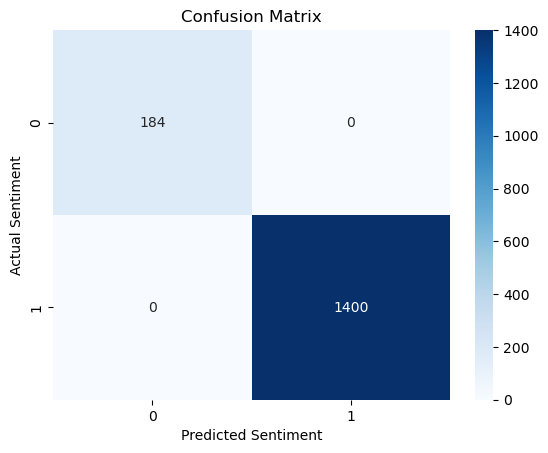

In [56]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import numpy as np

# Confusion matrix
cm = confusion_matrix(car_reviews['Sentiment'], car_reviews['Sentiment'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

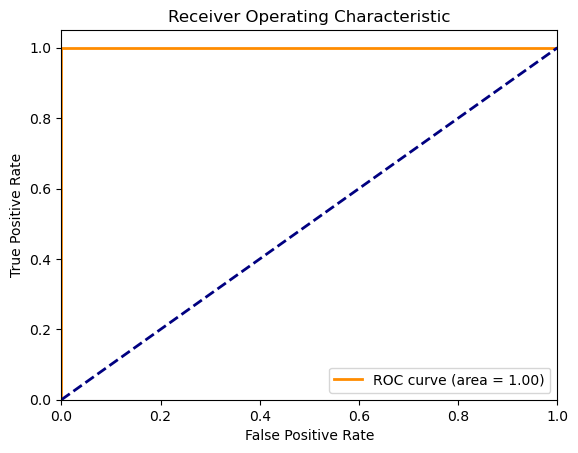

In [58]:
# ROC curve
fpr, tpr, _ = roc_curve(car_reviews['Sentiment'].astype(int), car_reviews['Sentiment'].astype(int))
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()